In [1]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
models = ['CESM2', 
          'CNRM-CM6-1', 
          'CNRM-ESM2-1', 
          'CanESM5', 
          'HadGEM3-GC31-LL', 
          'IPSL-CM5A2-INCA',
          'IPSL-CM6A-LR',
          'MIROC6',
          'MPI-ESM1-2-LR',
          'UKESM1-0-LL']

In [3]:
da = pd.DataFrame()

In [4]:
for model in models:
    for file in range(len(glob('{}_*.json'.format(model)))):
        print('reading file:', glob('{}_*.json'.format(model))[file])
        df = pd.read_json(glob('{}_*.json'.format(model))[file])
        
        
        _da = pd.DataFrame({'index': range(len(df['response']['docs']))}, columns=['index',
                           'activity_id',
                           'institution_id',
                           'source_id',
                           'xloc',
                           'experiment_id',
                           'member_id',
                           'yloc',
                           'table_id',
                           'variable_id',
                           'grid_label',
                           'version'])
        _da = _da.set_index('index')

        for i in range(len(df['response']['docs'])):
            _da['activity_id'][i]    = df['response']['docs'][i]['activity_id'][0]
            _da['institution_id'][i] = df['response']['docs'][i]['institution_id'][0]
            _da['source_id'][i]      = df['response']['docs'][i]['source_id'][0]
            _da['experiment_id'][i]  = df['response']['docs'][i]['experiment_id'][0]
            _da['member_id'][i]      = df['response']['docs'][i]['member_id'][0]
            _da['table_id'][i]       = df['response']['docs'][i]['table_id'][0]
            _da['variable_id'][i]    = df['response']['docs'][i]['variable_id'][0]
            _da['grid_label'][i]     = df['response']['docs'][i]['grid_label'][0]
            _da['version'][i]        = df['response']['docs'][i]['version']
        da = pd.concat([da, _da])

da.reset_index(inplace = True,drop=True)


reading file: CESM2_esgf_search.json
reading file: CNRM-CM6-1_esgf_search.json
reading file: CNRM-ESM2-1_esgf_search.json
reading file: CanESM5_esgf_search_1.json
reading file: CanESM5_esgf_search_2.json
reading file: HadGEM3-GC31-LL_esgf_search.json
reading file: IPSL-CM5A2-INCA_esgf_search.json
reading file: IPSL-CM6A-LR_esgf_search_1.json
reading file: IPSL-CM6A-LR_esgf_search_2.json
reading file: MIROC6_esgf_search_1.json
reading file: MIROC6_esgf_search_2.json
reading file: MPI-ESM1-2-LR_esgf_search_1.json
reading file: MPI-ESM1-2-LR_esgf_search_2.json
reading file: UKESM1-0-LL_esgf_search_1.json


In [5]:
members = ['r1i1p1f1', 'r1i1p1f2', 'r1i1p1f3', 'r1i1p2f1', 'r1i2000p1f1',
 'r2i1p1f1', 'r2i1p1f2', 'r2i1p1f3', 'r2i1p2f1',
 'r3i1p1f1', 'r3i1p1f2', 'r3i1p1f3', 'r3i1p2f1',
 'r4i1p1f1', 'r4i1p1f2', 'r4i1p1f3', 'r4i1p2f1',
 'r5i1p1f1', 'r5i1p1f2', 'r5i1p1f3', 'r5i1p2f1', 
 'r6i1p1f1', 'r6i1p1f2', 'r6i1p1f3', 'r6i1p2f1', 
 'r7i1p1f1', 'r7i1p1f2', 'r7i1p1f3', 'r7i1p2f1', 
 'r8i1p1f1', 'r8i1p1f2', 'r8i1p2f1', 
 'r9i1p1f1', 'r9i1p1f2', 'r9i1p2f1'
 'r10i1p1f1', 'r10i1p1f2',           'r10i1p2f1', 
 'r11i1p1f1', 'r11i1p1f2',           'r11i1p2f1', 
 'r12i1p1f1', 'r12i1p1f2',           'r12i1p2f1', 
 'r13i1p1f1', 'r13i1p1f2',           'r13i1p2f1', 
 'r14i1p1f1', 'r14i1p1f2',           'r14i1p2f1',
 'r15i1p1f1', 'r15i1p1f2',           'r15i1p2f1', 
 'r16i1p1f1', 'r16i1p1f2',           'r16i1p2f1', 
 'r17i1p1f1', 'r17i1p1f2',           'r17i1p2f1', 
 'r18i1p1f1', 'r18i1p1f2',           'r18i1p2f1', 
 'r19i1p1f1', 'r19i1p1f2',           'r19i1p2f1',
 'r20i1p1f1', 'r20i1p1f2',           'r20i1p2f1', 
 'r21i1p1f1', 'r21i1p1f2',           'r21i1p2f1', 
 'r22i1p1f1', 'r22i1p1f2',           'r22i1p2f1', 
 'r23i1p1f1', 'r23i1p1f2',           'r23i1p2f1', 
 'r24i1p1f1', 'r24i1p1f2',           'r24i1p2f1',
 'r25i1p1f1', 'r25i1p1f2',           'r25i1p2f1', 
 'r26i1p1f1', 'r26i1p1f2',
 'r27i1p1f1', 'r27i1p1f2', 
 'r28i1p1f1', 'r28i1p1f2', 
 'r29i1p1f1', 'r29i1p1f2', 
 'r30i1p1f1', 'r30i1p1f2', 
 'r31i1p1f1', 
 'r32i1p1f1', 
 'r33i1p1f1',
 'r34i1p1f1', 
 'r35i1p1f1', 
 'r36i1p1f1', 
 'r37i1p1f1', 
 'r38i1p1f1',
 'r39i1p1f1', 
 'r40i1p1f1', 
 'r41i1p1f1', 
 'r42i1p1f1', 
 'r43i1p1f1', 
 'r44i1p1f1',
 'r45i1p1f1', 
 'r46i1p1f1', 
 'r47i1p1f1', 
 'r48i1p1f1', 
 'r49i1p1f1',
 'r50i1p1f1',
       ]

In [6]:
for model, i in zip(da['source_id'].unique(), range(len(da['source_id'].unique()))):
    for member, k in zip(members, range(len(members))):
        (da.loc[da['member_id'] == member])['yloc'] = k 
        
        if len(((da.loc[da['source_id'] == model]).loc[da['member_id'] == member])) <=4:
            idx = ((da.loc[da['source_id'] == model]).loc[da['member_id'] == member]).index
            da.drop(idx, inplace=True)
    
            
    idx = ((da.loc[da['source_id'] == model]).loc[da['variable_id'] == 'clw']).index
    da['xloc'][idx] = i
    
    idx = ((da.loc[da['source_id'] == model]).loc[da['variable_id'] == 'cli']).index
    da['xloc'][idx] = i+.2
    
    idx = ((da.loc[da['source_id'] == model]).loc[da['variable_id'] == 'clivi']).index
    da['xloc'][idx] = i+.4
    
    idx = ((da.loc[da['source_id'] == model]).loc[da['variable_id'] == 'tas']).index
    da['xloc'][idx] = i+.6
    
    idx = ((da.loc[da['source_id'] == model]).loc[da['variable_id'] == 'prsn']).index
    da['xloc'][idx] = i+.8
    
da.reset_index(inplace = True,drop=True)



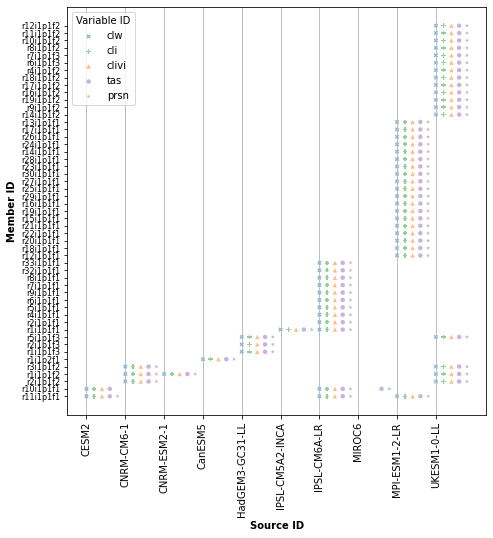

In [26]:
f, axsm = plt.subplots(1,1, figsize=[7.5, 7.5])

for model, i in zip(da['source_id'].unique(), range(len(da['source_id'].unique()))):
    
    if i == 0:
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'clw']).plot.scatter(ax=axsm,x='xloc', y='member_id', marker='X', c='tab:blue', label='clw', alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'cli']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='P', c='tab:green', label='cli', alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'clivi']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='^', c='tab:orange', label='clivi', alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'tas']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='o', c='tab:purple', label='tas', alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'prsn']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='*', c='tab:grey', label='prsn', alpha=0.5, edgecolors='none')
    
    
    else:
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'clw']).plot.scatter(ax=axsm,x='xloc', y='member_id', marker='X', c='tab:blue', label='_nolegend_', alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'cli']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='P', c='tab:green', label='_nolegend_', alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'clivi']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='^', c='tab:orange', label='_nolegend_', alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'tas']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='o', c='tab:purple', label='_nolegend_', alpha=0.5, edgecolors='none')
        ((da.loc[da['source_id']== model]).loc[da['variable_id'] == 'prsn']).plot.scatter(ax=axsm, x='xloc', y='member_id', marker='*', c='tab:grey', label='_nolegend_', alpha=0.5, edgecolors='none')


axsm.legend(labels=['clw', 'cli', 'clivi', 'tas', 'prsn'], loc=0, title='Variable ID', )
axsm.set_xticks(ticks=range(len(da['source_id'].unique())), labels=da['source_id'].unique(),rotation=90, fontsize=10)

axsm.set_yticks(range(len(da['member_id'].unique())), labels=da['member_id'].unique(), fontsize=8);
axsm.grid(axis='x')
# Set common labels
axsm.set_xlabel('Source ID', fontweight='bold')
axsm.set_ylabel('Member ID', fontweight='bold');


In [31]:
da.to_excel('cmip6_model_variables.xlsx', columns=['activity_id', 
                                                   'institution_id', 
                                                   'source_id',
                                                   'experiment_id',
                                                   'member_id',
                                                   'table_id',
                                                   'variable_id',
                                                   'grid_label',
                                                   'version'])

In [8]:
# f, axsm = plt.subplots(1,1, figsize=[7.5, 7.5])

# for i, model in zip(range(len(da['source_id'].unique())),da['source_id'].unique()):
    
#     _model = da.loc[(da['source_id'] == model)]
#     _model['xloc'].loc[_model['variable_id'] == 'clw'] = i
#     _model['xloc'].loc[_model['variable_id'] == 'cli'] = i+.2
#     _model['xloc'].loc[_model['variable_id'] == 'clivi'] = i+.4
#     _model['xloc'].loc[_model['variable_id'] == 'tas'] = i+.6
#     _model['xloc'].loc[_model['variable_id'] == 'prsn'] = i+.8
    
#     for k, member in zip(range(len(da['member_id'].unique())), da['member_id'].unique()):
#         _model['member_id'].loc[_model['member_id'] == member] = k
#         # if len(_model.loc[_model['member_id'] == member]) == 5:
#         #     _model['yloc'].loc[_model['member_id'] == member] = k
#         #     _model.loc[_model['member_id'] == member] = np.nan
#         #     # print(member, len(_model.loc[_model['member_id'] == member]))
    
    
    
#     if i == 0:
#         h1 = _model.loc[_model['xloc']==i].plot.scatter(ax=axsm, x='xloc', y='member_id', marker='X', c='tab:blue', label='clw', alpha=0.5, edgecolors='none')
#         h2 = _model.loc[_model['xloc']==i+.2].plot.scatter(ax=axsm, x='xloc', y='member_id', marker='P', c='tab:green', label='cli', alpha=0.5, edgecolors='none')
#         h3 = _model.loc[_model['xloc']==i+.4].plot.scatter(ax=axsm, x='xloc', y='member_id', marker='^', c='tab:orange', label='clivi', alpha=0.5, edgecolors='none')
#         h4 = _model.loc[_model['xloc']==i+.6].plot.scatter(ax=axsm, x='xloc', y='member_id', marker='o', c='tab:purple', label='tas', alpha=0.5, edgecolors='none')
#         h5 = _model.loc[_model['xloc']==i+.8].plot.scatter(ax=axsm, x='xloc', y='member_id', marker='*', c='tab:grey', label='prsn', alpha=0.5, edgecolors='none')

#     else:
#         _model.loc[_model['xloc']==i].plot.scatter(ax=axsm, x='xloc', y='member_id', marker='X', c='tab:blue', label='_nolegend_', alpha=0.5, edgecolors='none')
#         _model.loc[_model['xloc']==i+.2].plot.scatter(ax=axsm, x='xloc', y='member_id', marker='P', c='tab:green', label='_nolegend_', alpha=0.5, edgecolors='none')
#         _model.loc[_model['xloc']==i+.4].plot.scatter(ax=axsm, x='xloc', y='member_id', marker='^', c='tab:orange', label='_nolegend_', alpha=0.5, edgecolors='none')
#         _model.loc[_model['xloc']==i+.6].plot.scatter(ax=axsm, x='xloc', y='member_id', marker='o', c='tab:purple', label='_nolegend_', alpha=0.5, edgecolors='none')
#         _model.loc[_model['xloc']==i+.8].plot.scatter(ax=axsm, x='xloc', y='member_id', marker='*', c='tab:grey', label='_nolegend_', alpha=0.5, edgecolors='none')


# axsm.legend(labels=['clw', 'cli', 'clivi', 'tas', 'prsn'], loc=0, title='Variable ID', )
# axsm.set_xticks(ticks=range(len(da['source_id'].unique())), labels=da['source_id'].unique(),rotation=90, fontsize=10)

# axsm.set_yticks(range(len(da['member_id'].unique())), labels=da['member_id'].unique(), fontsize=5);
# axsm.grid(axis='x')
# # Set common labels
# axsm.set_xlabel('Source ID', fontweight='bold')
# axsm.set_ylabel('Member ID', fontweight='bold');
